In [1]:
library(tidyverse)
library(cowplot)
library(gridExtra)
library(grid)
library(GGally)
library(network)
library(sna)

# Custom package
library(rutils)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.0.6     v dplyr   1.0.4
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

network: Classes for Relational Data
Version 1.16.1 created on 2020-10-06.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
                    Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    Martina Morris, University of Washington
         

In [2]:
dirs <- rutils::get_dev_directories(dev_paths_file = "../dev_paths.txt")
unified_dsets <- c("unified_cervical_data", "unified_uterine_data", "unified_uterine_endometrial_data")
projects <- c("CESC", "UCS", "UCEC")

In [3]:
text_size <- 8
label_text_size <- 8
small_text_size <- 8
guide_size <- 4
family <- "ArialMT"
dpi <- 320
ht <- 7
wd <- 6
pt_to_mm <- 5 / 14

In [4]:
net_figs <- list()
midxs <- c(3, 3, 4)

for (idx in 1:3) {
    for (midx in seq_len(midxs[idx])) {
        net_figs[[paste0(projects[idx], midx)]] <- load(paste0(dirs$figures_dir, "/saved_obj/", unified_dsets[idx], "_netplot", midx, ".RData"))
    }
}
net_figs <- Reduce(c, net_figs)

In [5]:
net_figs

[1] "CESC_netplot1" "CESC_netplot2" "CESC_netplot3" "UCS_netplot1" 
 [5] "UCS_netplot2"  "UCS_netplot3"  "UCEC_netplot1" "UCEC_netplot2"
 [9] "UCEC_netplot3" "UCEC_netplot4"

In [6]:
set_margins <- function(plt, margins = c(0, 0, 0, 0)) {
    plt + theme(plot.margin = unit(margins, "cm"))
}

fix_coords <- function(plt) {
    plt + coord_fixed(ratio = 0.8)
}

set_coord_equal <- function(plt) {
    plt + coord_equal()
}

expand_plt_limits <- function(plt, xlims = c(0, 1), ylims = c(0, 1)) {
#     plt + scale_x_continuous(limits = xlims) + scale_y_continuous(limits = ylims)
    plt + xlim(xlims[1], xlims[2]) + ylim(ylims[1], ylims[2]) +
        theme(axis.text = element_blank(), axis.ticks = element_blank())
}

In [7]:
net_fig_list <- c(
    mget("CESC_netplot1") %>%
        purrr::map(function(p) { expand_plt_limits(p, c(-0.0, 1.03), c(-0.0, 1.0)) }),
    mget("CESC_netplot2") %>%
        purrr::map(function(p) { expand_plt_limits(p, c(-0.01, 1.05), c(-0.01, 1.05)) }),
    mget("CESC_netplot3") %>%
        purrr::map(function(p) { expand_plt_limits(p, c(-0.02, 1.02), c(-0.02, 1.0)) }),
    mget("UCEC_netplot1") %>%
        purrr::map(function(p) { expand_plt_limits(p, c(-0.0, 1.0), c(-0.0, 1.0)) }),
    mget("UCEC_netplot2") %>%
        purrr::map(function(p) { expand_plt_limits(p, c(-0.03, 1.03), c(-0.03, 1.03)) }),
    mget("UCEC_netplot3") %>%
        purrr::map(function(p) { expand_plt_limits(p, c(-0.03, 1.03), c(-0.03, 1.03)) }),
    mget("UCEC_netplot4") %>%
        purrr::map(function(p) { expand_plt_limits(p, c(-0.03, 1.03), c(-0.03, 1.03)) }),
    mget("UCS_netplot1") %>%
        purrr::map(function(p) { expand_plt_limits(p, c(-0.02, 1.02), c(-0.0, 1.0)) }),
    mget("UCS_netplot2") %>%
        purrr::map(function(p) { expand_plt_limits(p, c(-0.02, 1.02), c(-0.0, 1.0)) }),
    mget("UCS_netplot3") %>%
        purrr::map(function(p) { expand_plt_limits(p, c(-0.02, 1.02), c(-0.02, 1.02)) })
) %>%
    purrr::map(function(p) { set_margins(p, margins = c(0, 0, 0, 0)) }) %>%
    purrr::map(function(p) { set_coord_equal(p) })
#     purrr::map(function(p) { expand_plt_limits(p, xlims = c(-0.025, 1.03), ylims = c(-0.025, 1.025)) })

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', 

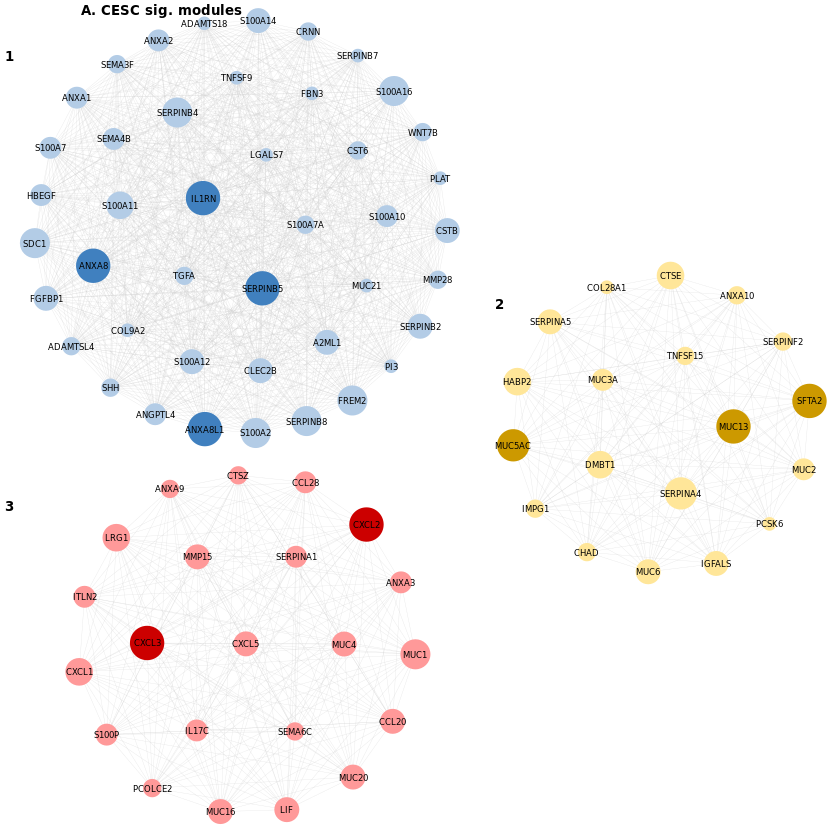

In [8]:
cesc_grid <- plot_grid(
    plot_grid(net_fig_list[[1]], net_fig_list[[3]], nrow = 2, rel_heights = c(1.2, 1), labels = c("1", "3"), label_size = label_text_size, label_fontfamily = family, label_y = 0.9),
    plot_grid(NULL, net_fig_list[[2]], NULL, nrow = 3, rel_heights = c(0.5, 1, 0.5), labels = c("", "2", ""), label_size = label_text_size, label_fontfamily = family, label_y = 0.8),
    ncol = 2,
    rel_widths = c(1.4, 1),
    labels = c("A. CESC sig. modules"),
    label_size = label_text_size,
    label_fontfamily = family
)
# +
#     geom_text(aes(label = "Sig. CESC FIGO networks", x = 0.75, y = 0.8), fontface = "bold", size = label_text_size * pt_to_mm)

cesc_grid

figS2A <- cesc_grid

In [10]:
ggsave(filename = paste0(dirs$figures_dir, "/paneled/figureS2A.png"), plot = figS2A, dpi = dpi, height = ht, width = wd)

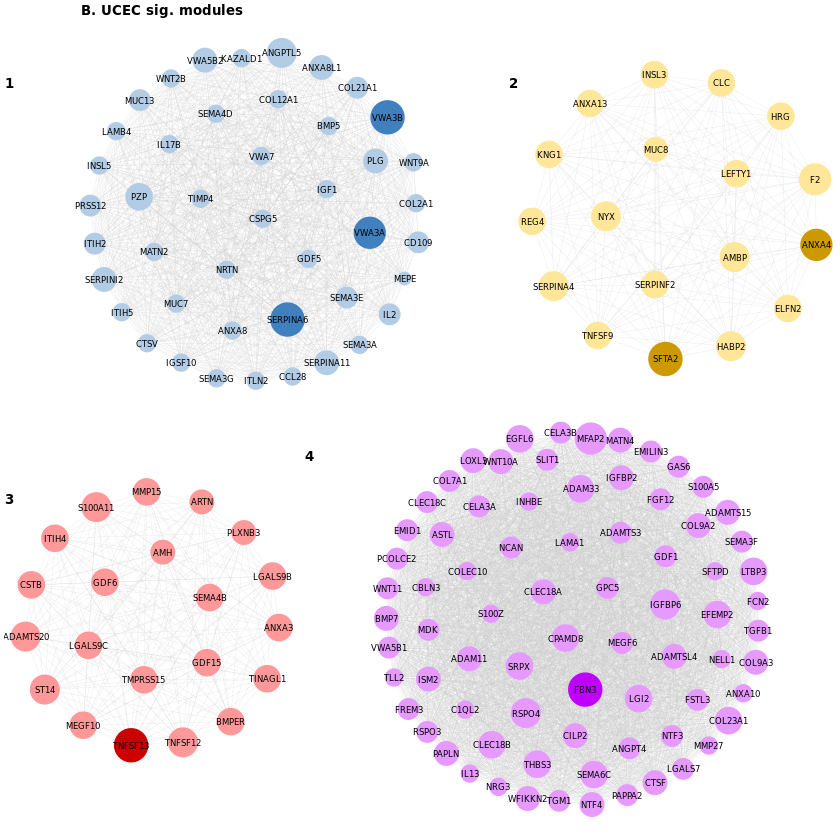

In [11]:
ucec_grid <- plot_grid(
    plot_grid(NULL),
    plot_grid(net_fig_list[[4]], net_fig_list[[5]], ncol = 2, rel_widths = c(1.5, 1), labels = c("1", "2"), label_size = label_text_size, label_fontfamily = family, label_y = 0.9),
    plot_grid(net_fig_list[[6]], net_fig_list[[7]], ncol = 2, rel_widths = c(1, 1.8), labels = c("3", "4"), label_size = label_text_size, label_fontfamily = family, label_y = c(0.8, 0.9)),
    nrow = 3,
    rel_heights = c(0.1, 1, 1.2),
    labels = c("B. UCEC sig. modules"),
    label_size = label_text_size,
    label_fontfamily = family
)
# +
#     geom_text(aes(label = "Sig. UCEC FIGO networks", x = 0.3, y = 0.97), fontface = "bold", size = label_text_size * pt_to_mm)


ucec_grid

figS2B <- ucec_grid

In [12]:
ggsave(filename = paste0(dirs$figures_dir, "/paneled/figureS2B.png"), plot = figS2B, dpi = dpi, height = ht, width = wd)

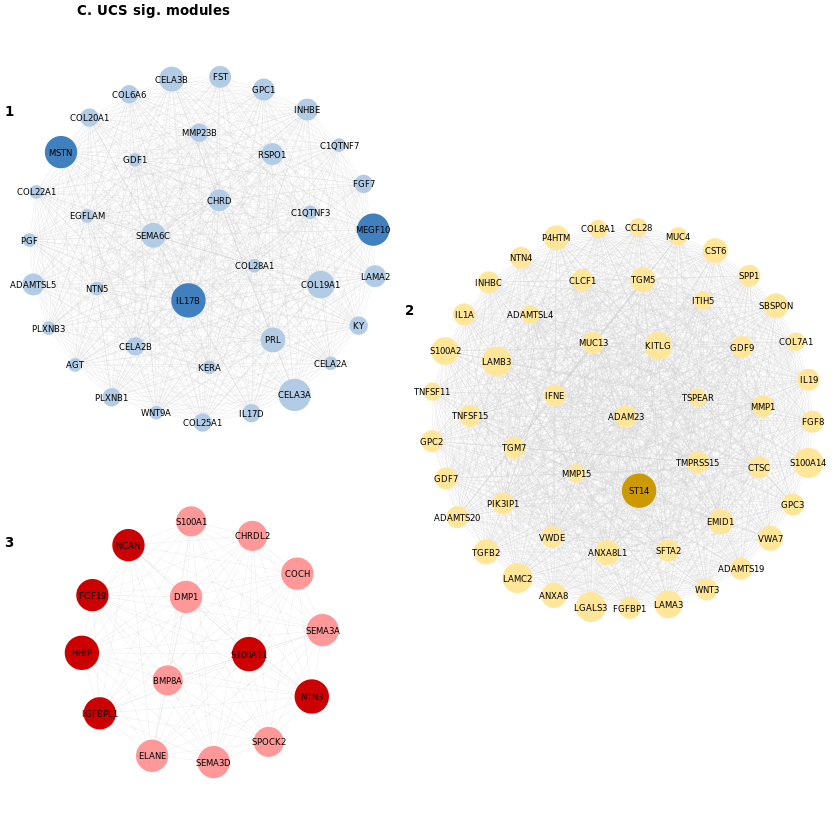

In [14]:
ucs_grid <- plot_grid(
    plot_grid(net_fig_list[[8]], net_fig_list[[10]], NULL, nrow = 3, rel_heights = c(1.8, 1, 0.2), labels = c("1", "3"), label_size = label_text_size, label_fontfamily = family, label_y = c(0.8, 0.9)),
    plot_grid(NULL, net_fig_list[[9]], NULL, nrow = 3, rel_heights = c(0.2, 1, 0.2), labels = c("", "2", ""), label_size = label_text_size, label_fontfamily = family, label_y = 0.7),
    ncol = 2,
    rel_widths = c(1, 1.1),
    labels = c("C. UCS sig. modules"),
    label_size = label_text_size,
    label_fontfamily = family
)
# +
#     geom_text(aes(label = "Sig. UCS FIGO networks", x = 0.7, y = 0.9), fontface = "bold", size = label_text_size * pt_to_mm)

ucs_grid

figS2C <- ucs_grid

In [15]:
ggsave(filename = paste0(dirs$figures_dir, "/paneled/figureS2C.png"), plot = figS2C, dpi = dpi, height = ht, width = wd)